In [1]:
%load_ext autoreload
%autoreload 2

import ncem

datadir = "/Users/anna.schaar/phd/datasets/"

In [2]:
interpreter = ncem.interpretation.interpreter.InterpreterGraph()
interpreter.get_data(
    data_path=datadir + '/visium/',
    data_origin='10xvisium',
    radius=0,
    n_rings=1,
    node_label_space_id='type',
    node_feature_space_id='standard',
)
print('\n Celldata metadata:', interpreter.data.celldata.uns['metadata'])


Loading data from raw files
registering celldata


100%|██████████| 1/1 [00:00<00:00, 50.26it/s]

collecting image-wise celldata
adding graph-level covariates
Loaded 1 images with complete data from 1 patients over 2688 cells with 500 cell features and 15 distinct celltypes.
Mean of mean node degree per images across images: 5.796131

 Celldata metadata: {'lateral_resolution': 1.0, 'fn': 'visium_hne_adata.h5ad', 'image_col': 'in_tissue', 'cluster_col': 'cluster', 'cluster_col_preprocessed': 'cluster_preprocessed', 'patient_col': 'in_tissue', 'n_top_genes': 600}


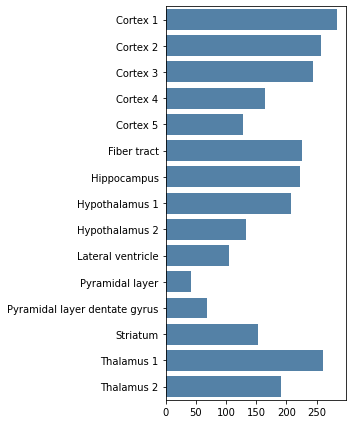

In [4]:
adata = interpreter.data.spatial(
    image_key= "1",
    spot_size=100
    #panel_width=5,
    #panel_height=5,
    #fontsize=12,
)

100%|██████████| 1/1 [00:00<00:00,  5.68it/s]


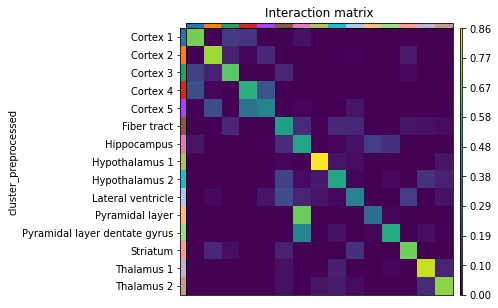

In [5]:
interpreter.data.celldata_interaction_matrix(figsize=(4,4))

  0%|          | 0/1 [00:00<?, ?it/s]/Users/anna.schaar/opt/miniconda3/envs/ncem/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3370: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
100%|██████████| 1/1 [00:01<00:00,  1.46s/it]


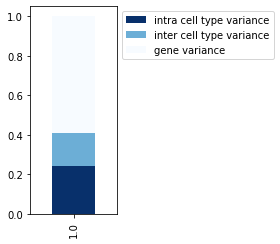

In [6]:
var_decomp = interpreter.data.compute_variance_decomposition()
interpreter.data.variance_decomposition(
    var_decomp, figsize=(4.,3.5)
)

In [7]:
var_decomp.mean(axis=0)[['intra cell type variance', 'inter cell type variance', 'gene variance']]

intra cell type variance    0.240182
inter cell type variance    0.167483
gene variance               0.592335
dtype: float32

/Users/anna.schaar/opt/miniconda3/envs/ncem/lib/python3.8/site-packages/omnipath/_core/requests/_utils.py:155: FutureWarning: The default value of regex will change from True to False in a future version.
  _split_unique_join(data.str.replace(r"[-\w]*:?(\d+)", r"\1")), func=func


n cells: 2688


/Users/anna.schaar/opt/miniconda3/envs/ncem/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2630: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


  0%|          | 0/1000 [00:00<?, ?permutation/s]

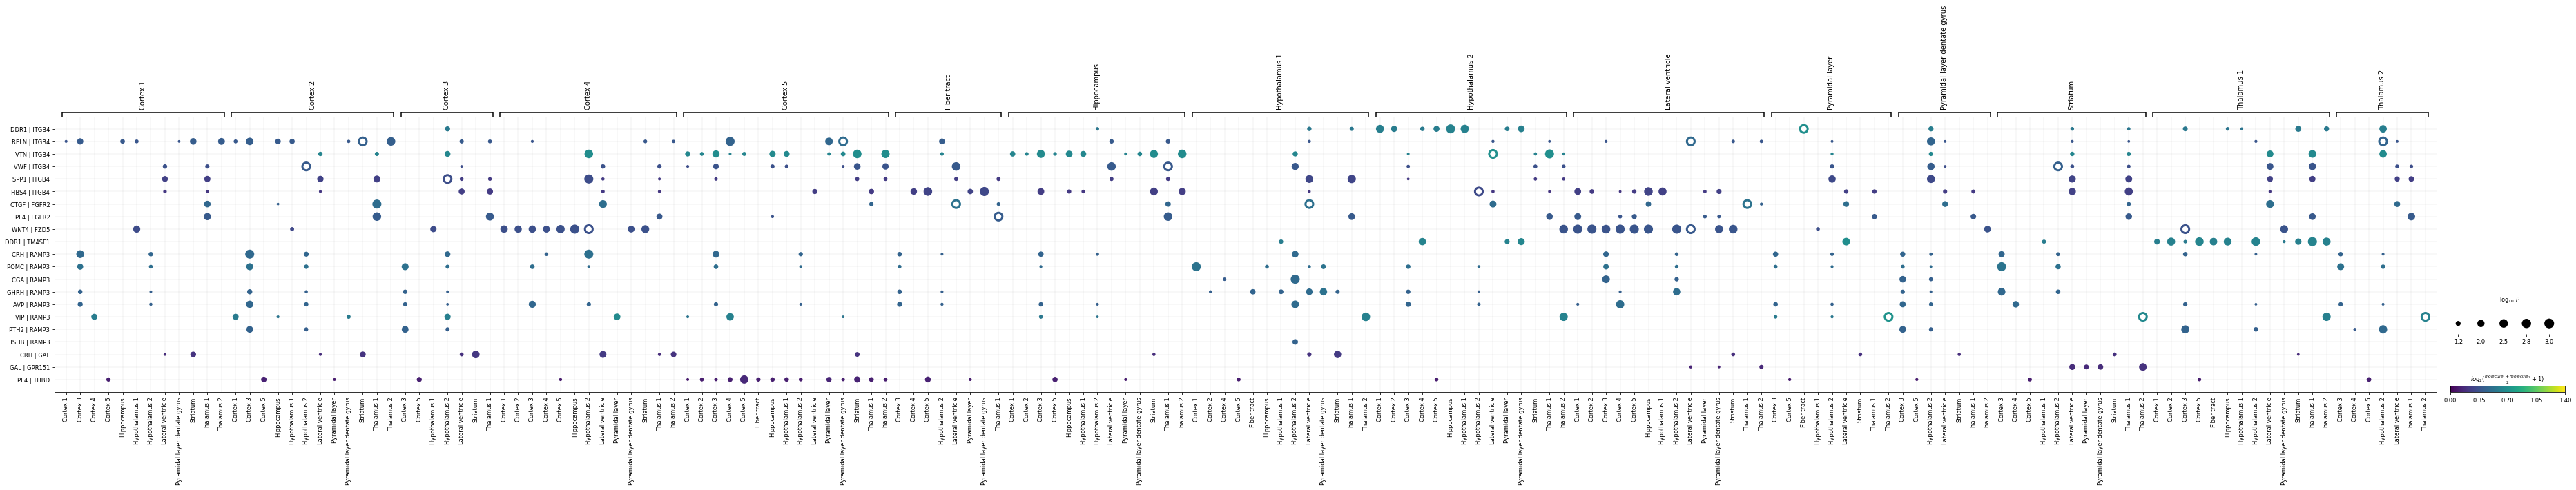

In [8]:
adata = interpreter.data.ligrec()

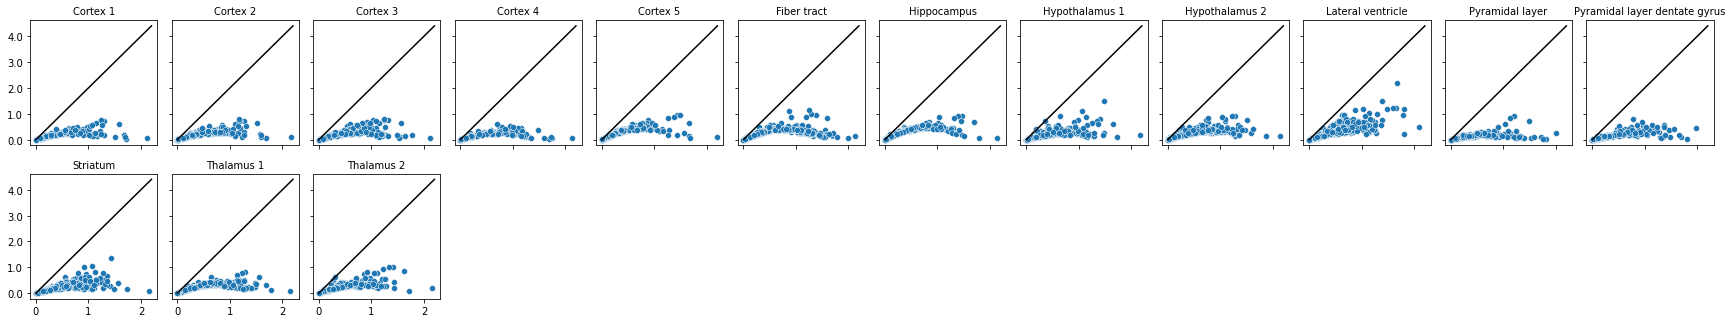

In [9]:
interpreter.data.noise_structure(min_x=0.0, max_x=2.2)